# DATA SOURCE FROM ELSEWHERE (ANALYSIS)

Source: Beyond fitness tracking: The use of consumer-grade wearable data from normal volunteers in cardiovascular and lipidomics research, Weng et al, Feb 2018. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5828350/#!po=68.5897

This study collect data from 233 subjects and investigated health indicators like RHR and the relationship with disease markers like blood pressure, etc. Subjects are required to wear the tracker for 5 days. Thus data are over 5 days only.

Data was previously processed and saved as CSV file, "Other_Source_Processed.csv".

In [1]:
import pandas as pd
import os
import numpy as np
import datetime as dt

import seaborn as sns # use for visualising
import matplotlib.pyplot as plt
from scipy import stats as sps
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

### Loading from CSV File

In [2]:
current_directory = os.getcwd()
folder_path = os.path.join(current_directory,'Beyond fitness tracking, Weng et al, 2018 Feb 27')
file_name = 'Other_Source_Processed.csv'

df_profiles_final = pd.read_csv(os.path.join(folder_path,file_name),index_col='key_0')
df_profiles_final

,Gender,Age_x,BMI,Smoking_Hx,Smoking_Packs,Smoking_Duration,MH_Diabetes_Mellitus,MH_Hypertension,MH_Hyperlipidemia,MH_Cancer,...,SBP,DBP,HDL,LDL,TotalChol,Triglycerides,Glucose,Steps,age_cat,bmi_cat
key_0,,,,,,,,,,,,,,,,,,,,,
0115-0050-NHC,M,65,28.273129,Yes,1.0,35,No,No,No,No,...,117,81.0,1.16,5.77,7.98,2.32,5.7,3309.285714,50s & above,Overweight
0115-0066-NHC,M,48,24.088223,No,0.0,0,No,No,No,No,...,127,82.0,1.28,3.01,4.75,1.01,5.2,11065.750000,40s,Normal
0115-0070-NHC,F,51,20.880963,No,0.0,0,Unknown,Unknown,Unknown,Unknown,...,115,73.0,1.54,4.60,6.60,1.02,5.3,4659.285714,50s & above,Normal
0115-0074-NHC,F,41,22.647377,No,0.0,0,No,Unknown,No,No,...,135,89.0,1.43,3.74,5.71,1.20,6.1,9417.000000,40s,Normal
0115-0075-NHC,M,50,26.098104,No,0.0,0,No,No,No,No,...,129,76.0,1.13,3.17,4.75,0.99,5.1,9307.285714,50s & above,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216-0033-NHC,F,48,21.130000,No,0.0,0,No,No,No,No,...,147,72.0,1.84,2.99,5.09,0.58,5.3,8914.222222,40s,Normal
1216-0064-NHC,F,60,20.690000,No,0.0,0,No,No,No,No,...,135,83.0,1.66,3.93,6.13,1.18,4.7,15001.833333,50s & above,Normal
1216-0070-NHC,F,54,26.760000,No,0.0,0,No,No,No,No,...,127,75.0,1.17,3.45,5.00,0.83,5.4,6954.000000,50s & above,Overweight


In [8]:
df_profiles_final.Gender.value_counts()

F    137
M     96
Name: Gender, dtype: int64

In [9]:
df_profiles_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233 entries, 0115-0050-NHC to 1216-0079-NHC
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                233 non-null    object 
 1   Age_x                 233 non-null    int64  
 2   BMI                   233 non-null    float64
 3   Smoking_Hx            233 non-null    object 
 4   Smoking_Packs         233 non-null    float64
 5   Smoking_Duration      233 non-null    object 
 6   MH_Diabetes_Mellitus  233 non-null    object 
 7   MH_Hypertension       233 non-null    object 
 8   MH_Hyperlipidemia     233 non-null    object 
 9   MH_Cancer             233 non-null    object 
 10  Sleep_Hours           233 non-null    float64
 11  Pulse_Rate            233 non-null    float64
 12  SBP                   233 non-null    int64  
 13  DBP                   233 non-null    float64
 14  HDL                   233 non-null    float64
 15  LDL   

In [135]:
df_profiles_final.Gender.value_counts()

F    137
M     96
Name: Gender, dtype: int64

In [4]:
# Split into Genders:

profiles_male = df_profiles_final[df_profiles_final.Gender == 'M']
profiles_female = df_profiles_final[df_profiles_final.Gender == 'F']

In [10]:
# Specifying Column names for eaier reference:

Generic_col = ['Gender','Age_x','BMI','Smoking_Hx'] # Generic Info
Smoker_col = ['Smoking_Packs','Smoking_Duration'] # Smoker info
Illness_col = ['MH_Diabetes_Mellitus','MH_Hypertension','MH_Hyperlipidemia','MH_Cancer'] # Existing illness info
Tracker_col = ['Sleep_Hours','Pulse_Rate','Steps'] # Health tracker stats
BP_col = ['SBP','DBP'] # Blood Pressure Info
Cholestrol_col = ['HDL','LDL','TotalChol','Triglycerides','Glucose'] # Cholestrol / Lipid Info

In [126]:
variables_col = Tracker_col + BP_col + Cholestrol_col

## Clustering is used to see if K-means can seperate 3 groups (Healthy, Average, Unhealthy)

In [128]:
profiles_male['Smoking_Hx'].value_counts()

No     220
Yes     13
Name: Smoking_Hx, dtype: int64

In [134]:
profiles_male['bmi_cat'].value_counts()

Normal         61
Overweight     27
Obese           7
Underweight     1
Name: bmi_cat, dtype: int64

### MALES

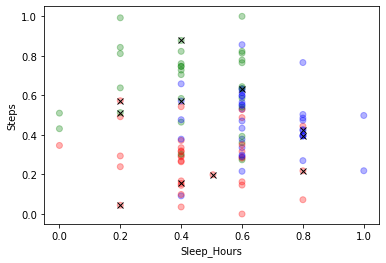

In [133]:
# preprocessing
from sklearn import preprocessing

x_plot = profiles_male[variables_col]

# MinMax Scaler:
scaler = preprocessing.MinMaxScaler()  #.StandardScaler()
scaler.fit(x_plot)
scaled_X = pd.DataFrame(scaler.transform(x_plot))
scaled_X.columns = x_plot.columns
scaled_X.index = x_plot.index

# Clusttering
y_pred = KMeans(n_clusters=3, random_state=50).fit_predict(scaled_X)

colormap = np.array(['r', 'g', 'b'])

plt.scatter(scaled_X.loc[:,'Sleep_Hours'], scaled_X.loc[:,'Steps'], c=colormap[y_pred],alpha=0.3)
plt.plot(Smokers.loc[:,'Sleep_Hours'],Smokers.loc[:,'Steps'],'xk',label='Smokers')
plt.xlabel('Sleep_Hours')
plt.ylabel('Steps')
plt.show()




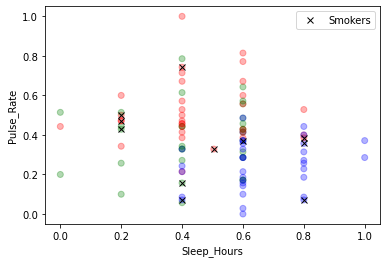

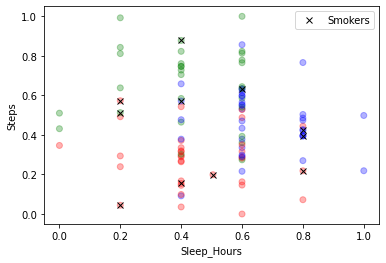

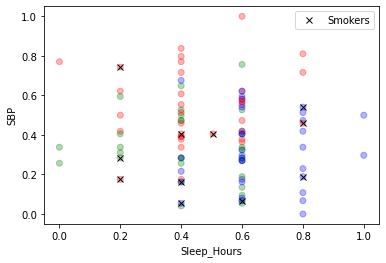

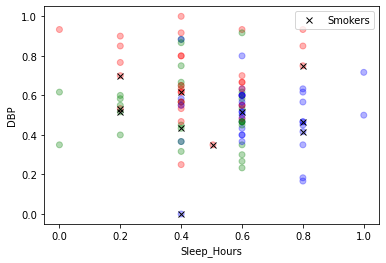

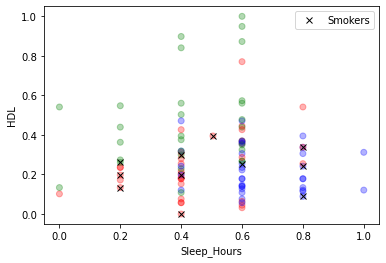

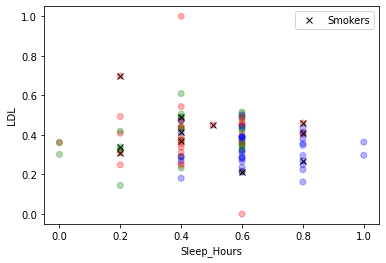

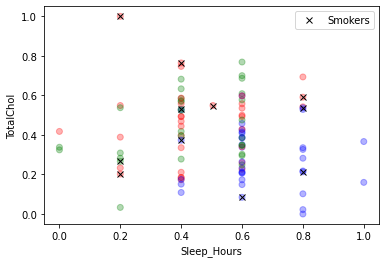

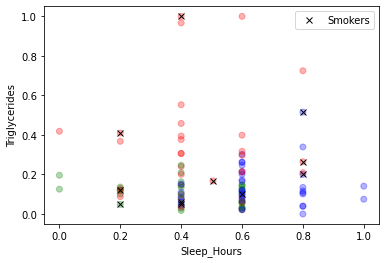

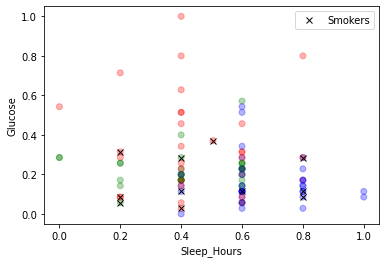

In [113]:
# In comparison to Sleep:

for x in range(1,len(scaled_X.columns)):
    plt.scatter(scaled_X.iloc[:,0], scaled_X.iloc[:,x], c=colormap[y_pred],alpha=0.3)
    plt.plot(Smokers.iloc[:,0],Smokers.iloc[:,x],'xk',label='Smokers')
    plt.legend()
    plt.xlabel(scaled_X.columns[0])
    plt.ylabel(scaled_X.columns[x])
    plt.show()

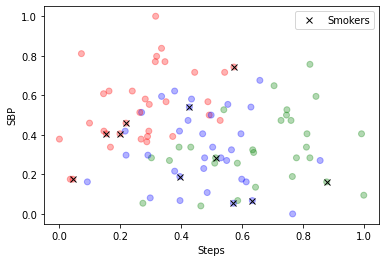

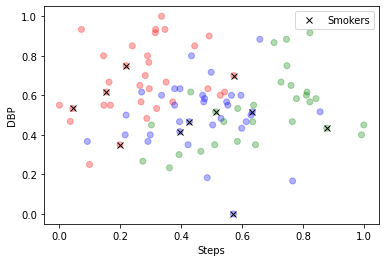

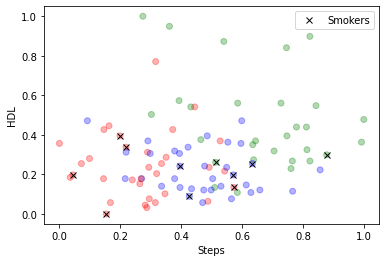

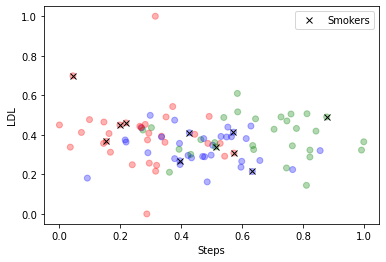

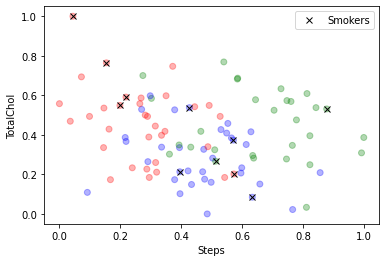

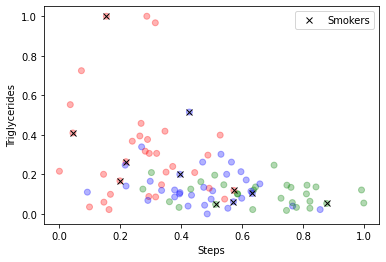

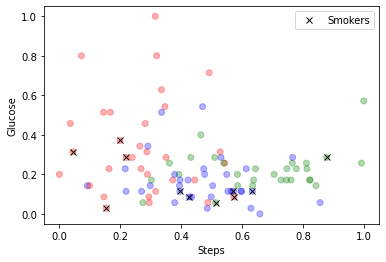

In [112]:
# In comparison to Activity:

for x in range(3,len(scaled_X.columns)):
    plt.scatter(scaled_X.iloc[:,2], scaled_X.iloc[:,x], c=colormap[y_pred],alpha=0.3)
    plt.plot(Smokers.iloc[:,2],Smokers.iloc[:,x],'xk',label='Smokers')
    plt.legend()
    plt.xlabel(scaled_X.columns[2])
    plt.ylabel(scaled_X.columns[x])
    plt.show()

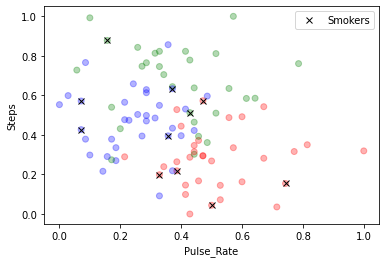

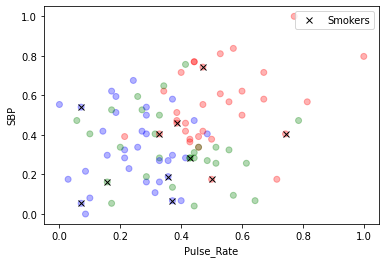

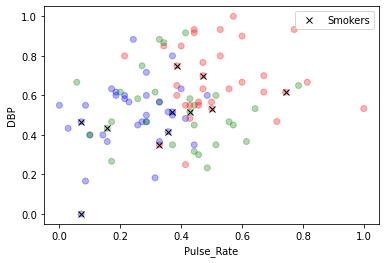

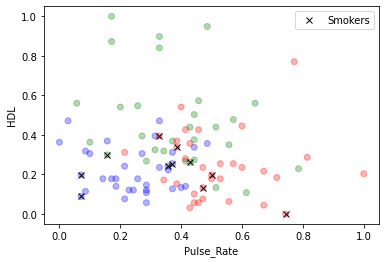

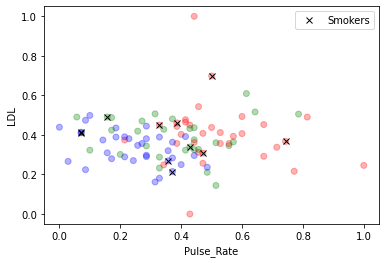

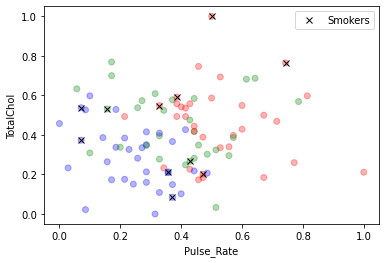

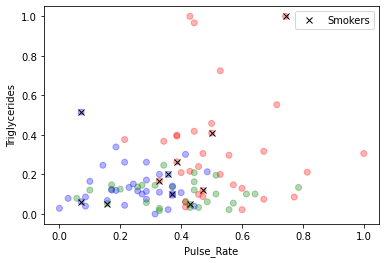

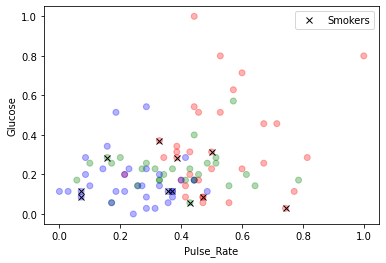

In [111]:
# In comparison to Heart Rate:

for x in range(2,len(scaled_X.columns)):
    plt.scatter(scaled_X.iloc[:,1], scaled_X.iloc[:,x], c=colormap[y_pred],alpha=0.3)
    plt.plot(Smokers.iloc[:,1],Smokers.iloc[:,x],'xk',label='Smokers')
    plt.legend()
    plt.xlabel(scaled_X.columns[1])
    plt.ylabel(scaled_X.columns[x])
    plt.show()